<h1> Загрузка и первичный анализ данных

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
!pip install pyspark

In [133]:
from pyspark.sql import SparkSession

In [134]:
path_1 = "/content/drive/My Drive/query_1.csv"
path_2 = "/content/drive/My Drive/query_3.csv"

In [135]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

In [136]:
query_1 = spark.read.load(path_1, format='csv', header='true', inferSchema='true')

In [137]:
query_3 = spark.read.load(path_2, format='csv', header='true', inferSchema='true')

In [138]:
query_1.registerTempTable('query_1')
query_3.registerTempTable('query_3')

In [ ]:
#spark.sql('SELECT * FROM query_1').show()

In [140]:
query_1

DataFrame[model: string, flights_amount: int]

In [ ]:
#daily in september 2018
#spark.sql('SELECT * FROM query_3').show()

In [142]:
query_3

DataFrame[city: string, average_flights: double]

Загрузили данные ,<br>
<br>
Изучили таблицы : query_1 можно назвать таблицей с данными о популярности модели самолета , вторую таблицу - query_3, о популярности городов в сентябре 2018 года,где данные - среднее кол-во перелетов в день<br>
<br>
Проверили данные на корректность: с этим все впорядке , данные о количестве в первой таблицей в целых , а во второй о среднем в день - вещественные

<h1> Графики и Анализ

In [143]:
#top 10 cities
top_10 = spark.sql('SELECT * FROM query_3 ORDER BY average_flights DESC LIMIT 10;')

In [ ]:
#top_10.show()

In [145]:
top_10df = top_10.toPandas()

In [146]:
import matplotlib.pyplot as plt

In [147]:
import seaborn as sns

In [ ]:
#top_10df

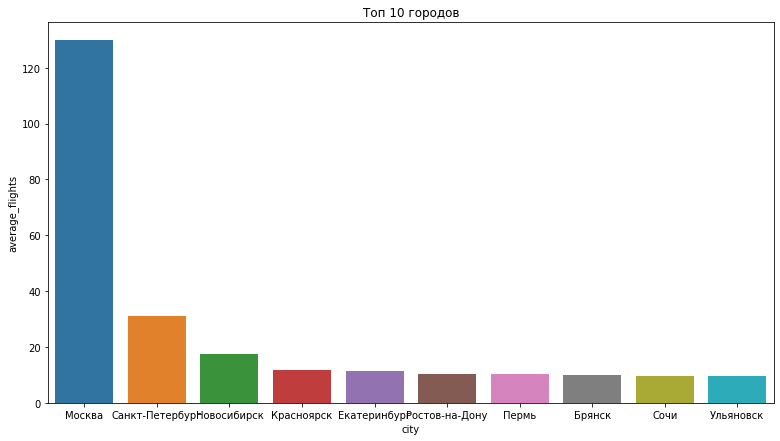

In [149]:
plt.figure(figsize=(13,7))
sns.barplot(x='city',y='average_flights', data = top_10df).set_title('Топ 10 городов');

Видим ,что Москва как и стоило ожидать в топе ,ибо это столица и самый крупынй город, в нем 3 основных аэропорта + 2 доп , также в Москве очень много пересадок на разные странны ,в которые с других городов либо невозможно ,либо редкость улететь<br>
<br>
Также Питер на втором месте , также один из самых крупнейших городов , второй по численности , а также культурная столица , которая также близка к границе с Европой , а также там много перелетов на другие страны
<br>
<br>
Новосибирск идет третьим крупнейшим городом России  Красноярск ,также как и Екатеренбург и Ростов-на-Дону и т.д. ялвются крупнейшиними городами в России , что и делает их центрами перелетов , прилетов и вылетов

In [150]:
query_3df = query_3.toPandas()

In [152]:
query_3df.sort_values(by = 'city',ascending=True, inplace=True)

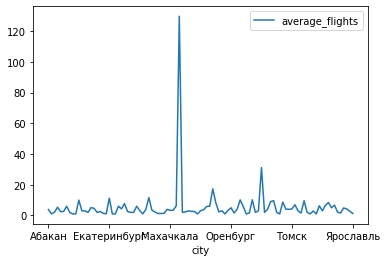

In [153]:
query_3df.plot(x='city');

Можем наблюдать какие незначительные перелеты в сравнении с Москвой в других городах , небольшие холмы наблюдаем на более крупных городах , также выделяются Питер и Новосибирск из остальных небольших холмиков - чуть более большим холмиком <br><br>
Можно сделать вывод ,что Москва также однозначно является столицей вылетов/перелетов/прилетов в России

In [154]:
query_1df = query_1.toPandas()

In [156]:
query_1df.sort_values(by = 'flights_amount', ascending=True, inplace=True)

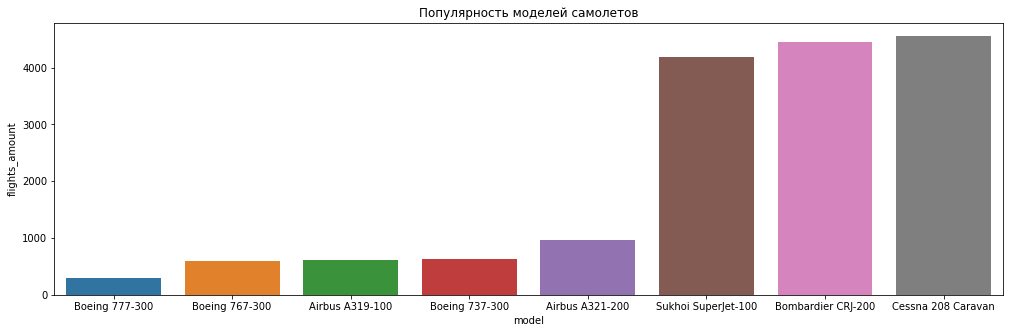

In [157]:
plt.figure(figsize=(17,5))
sns.barplot(x='model',y='flights_amount', data = query_1df).set_title('Популярность моделей самолетов');

 Вместимость
 <ul>
    <li>Boeing 777-300 вместимость 450 человек</li>
    <li>Boeing 767-300 вместимость 336 человек</li>
    <li>Airbus A319-100 вместимость 156 человек</li>
    <li>Boeing 737-300 вместимость 149 человек</li>
    <li>Airbus A321-200 220 человек</li>
    <li>Sukhoi SuperJet-100 98 человек</li>
    <li>Bombardier CRJ-200 50 человек</li>
    <li>Cessna 208 Caravan	вместимость 14 человек</li>
</ul>
Исходя из вместимости можно сделать вывод , что самые популярные самолеты ( топ 3 ) те ,которые расчитаны на малую дистанцию и на небольшое количество людей , более крупные самолеты уже не так популярны по сравнению с топ 3 ,но также летают достаточно часто - что и стоило ожидать , так как они расчитаны на более дальние дистанции и на большее количество людей , а это осущствлять часто достаточно сложно исходя из того,что частые рейсы - риск ,что они не будут успевать заполоняться ,а также трудности с их частым обслуживанием

<h1> Проверка гипотезы

Нулевые гипотезы берем так ,чтобы они трактовали нам о том что их средние не различаются ,в то время как альтернативная гипотеза говорит об обратном
<br>
Пороговое значение alpha = 0.05 , является стандартным порогом для принятия/не принятия гипотезы 

In [158]:
path_3 = "/content/drive/My Drive/query_last.csv"

In [159]:
query_last = spark.read.load(path_3, format='csv', header='true', inferSchema='true')
query_last.registerTempTable('query_last')

In [ ]:
#query_last.show()

In [179]:
non_festivalweek = spark.sql('SELECT ticket_amount,CAST(festival_week AS integer) FROM query_last WHERE festival_week = "NULL"')
festivalweek = spark.sql('SELECT ticket_amount,CAST(festival_week AS integer) FROM query_last WHERE festival_week != "NULL"')

In [ ]:
#non_festivalweek.show()

In [ ]:
#festivalweek.show()

In [182]:
non_festivalweek_df = non_festivalweek.toPandas()
festivalweek_df = festivalweek.toPandas()

Для данной гипотезы нулевой будет H<sub>0</sub>: non_festivalweek_df['ticket_amount'] == festivalweek_df['ticket_amount']
<br>
Альтернативной гипотезой будет H<sub>1</sub>: non_festivalweek_df['ticket_amount'] != festivalweek_df['ticket_amount']
<br>

In [184]:
from scipy import stats as st

In [185]:
alpha = 0.05

ttest_result_1 = st.ttest_ind(non_festivalweek_df['ticket_amount'],festivalweek_df['ticket_amount'])

print('p-значение:',ttest_result_1.pvalue)

if (ttest_result_1.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


Так как не можем отвергнуть нулевую гипотезу - значит ,что среднее количество билетов одинаковое , но в данном тесте при небольшой выборке сложно сказать о корректности данного теста ,также на глаз анализируя данные - можно сказать ,что отличаются , так как в 30ую неделю заметен спад количества билетов ( возможно связано с тем ,что в конце 29ой недели все прилетели на выходных на фестиваль в силу необычности данного фестиваля,либо какие-то другие внешние факторы ,которые повлияли на спад следующей недели),но можно однозначно сказать о том ,что в недели фестиваля не увеличивается количество билетов ,что на самом деле странно